## Data Preprocessing

In [1]:
import pandas as pd

# Load the dataset
file_path = 'zomato_reviews.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Preview the data
print(df.head(10))

                                         Review Text  Rating  \
0  Those look like flavors of juice that you put ...       5   
1               try ordering and tell what you found       3   
2                              Interested in answers       5   
3  Definitely code for something. But definitely ...       3   
4           Use COD and order and give us an update.       3   
5                All are in same location "NayaGaon"       3   
6  Could it be a way to deliver drugs? With price...       5   
7  Okay not sure if it's the same but naughty str...       5   
8  Why did my mind go to prostitution?Guess we'll...       3   
9  I guess they're adding Prime and Feastables in...       3   

                  Date          Location           Reviewer ID  \
0  2024-11-17 10:34:47    Chennai, India  Melodic-Economist114   
1  2024-11-17 10:12:43  Hyderabad, India           tempest_aww   
2  2024-11-17 10:08:35    Chennai, India         crasherdgrate   
3  2024-11-17 10:31:23     Mumb

In [2]:
# Fill missing values in the Review Text column with an empty string
df['Review Text'] = df['Review Text'].fillna('')

In [3]:
import emoji

# Function to extract emojis from text
def extract_emojis(text):
    return ''.join(c for c in text if c in emoji.EMOJI_DATA)

# Create a new column for extracted emojis
df['Extracted Emojis'] = df['Review Text'].apply(extract_emojis)

# Preview the data with the new column
print(df[['Review Text', 'Extracted Emojis']].head())


                                         Review Text Extracted Emojis
0  Those look like flavors of juice that you put ...                 
1               try ordering and tell what you found                 
2                              Interested in answers                 
3  Definitely code for something. But definitely ...                 
4           Use COD and order and give us an update.                 


In [4]:
import re
from nltk.corpus import stopwords

# Download stopwords (run this once)
# import nltk
# nltk.download('stopwords')

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.lower()  # Convert to lowercase
    text = ' '.join(word for word in text.split() if word not in stopwords.words('english'))  # Remove stopwords
    return text

# Apply the cleaning function
df['Cleaned Review'] = df['Review Text'].apply(clean_text)

# Preview cleaned data
print(df[['Review Text', 'Cleaned Review']].head())

                                         Review Text  \
0  Those look like flavors of juice that you put ...   
1               try ordering and tell what you found   
2                              Interested in answers   
3  Definitely code for something. But definitely ...   
4           Use COD and order and give us an update.   

                                      Cleaned Review  
0  look like flavors juice put vapes pricing also...  
1                            try ordering tell found  
2                                 interested answers  
3  definitely code something definitely money lau...  
4                       use cod order give us update  


In [5]:
# Save the cleaned data to a new CSV file
df.to_csv('processed_reviews.csv', index=False)

# Confirm the file was saved
print("Data preprocessing complete. File saved as 'processed_reviews.csv'")

Data preprocessing complete. File saved as 'processed_reviews.csv'


## Exploratory Data Analysis

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the processed data
df = pd.read_csv('processed_reviews.csv')

# Quick overview of the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Review Text         10000 non-null  object
 1   Rating              10000 non-null  int64 
 2   Date                10000 non-null  object
 3   Location            10000 non-null  object
 4   Reviewer ID         10000 non-null  object
 5   Sentiment Polarity  10000 non-null  object
 6   Category            10000 non-null  object
 7   Extracted Emojis    378 non-null    object
 8   Cleaned Review      9897 non-null   object
dtypes: int64(1), object(8)
memory usage: 703.3+ KB
None
             Rating
count  10000.000000
mean       3.520400
std        1.134069
min        2.000000
25%        3.000000
50%        3.000000
75%        5.000000
max        5.000000


C:\Users\Siddhesh\AppData\Local\Temp\ipykernel_7964\3754902462.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment Polarity', palette='coolwarm')


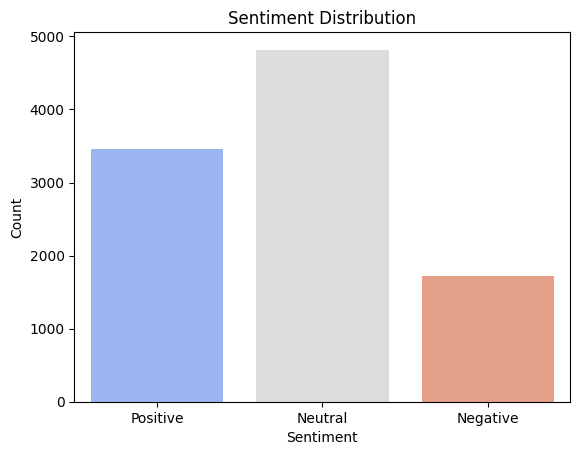

In [7]:
# Plot sentiment distribution
sns.countplot(data=df, x='Sentiment Polarity', palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

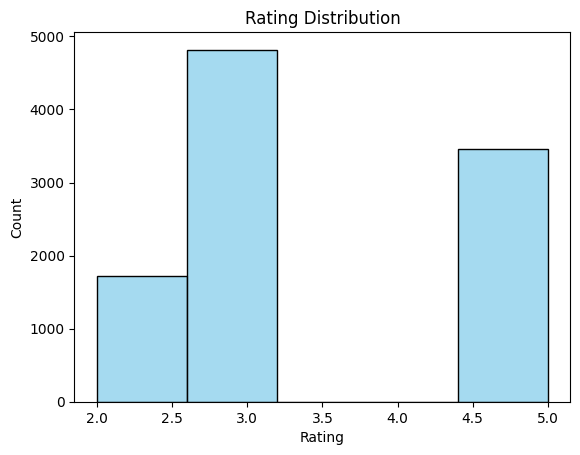

In [8]:
# Plot rating distribution
sns.histplot(df['Rating'], bins=5, kde=False, color='skyblue')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

C:\Users\Siddhesh\AppData\Local\Temp\ipykernel_7964\2944171638.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')


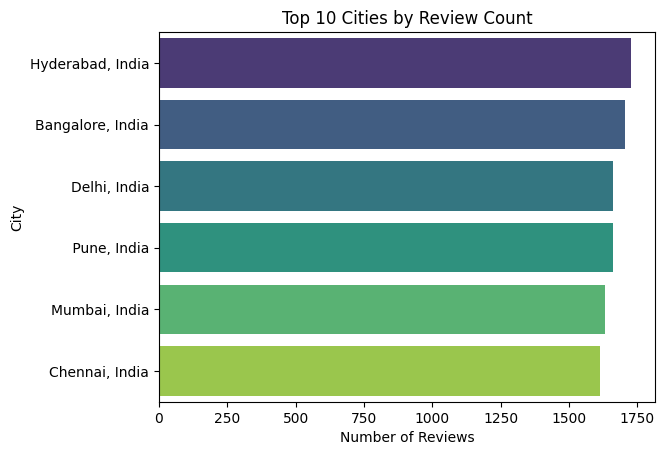

In [9]:
# Top 10 cities by review count
top_cities = df['Location'].value_counts().head(10)

# Plot top cities
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title('Top 10 Cities by Review Count')
plt.xlabel('Number of Reviews')
plt.ylabel('City')
plt.show()

C:\Users\Siddhesh\AppData\Local\Temp\ipykernel_7964\2927724070.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=emoji_df, x='Emoji', y='Count', palette='rocket')
C:\Users\Siddhesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Siddhesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Siddhesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_

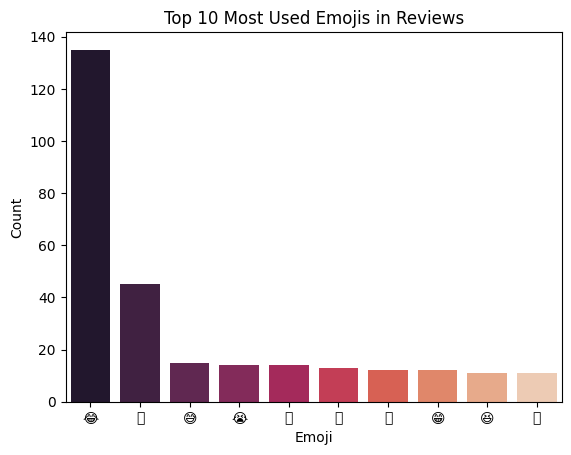

In [10]:
from collections import Counter

# Count the most common emojis
emoji_counts = Counter("".join(df['Extracted Emojis'].dropna()))
top_emojis = emoji_counts.most_common(10)

# Create a DataFrame for visualization
emoji_df = pd.DataFrame(top_emojis, columns=['Emoji', 'Count'])

# Plot top emojis
sns.barplot(data=emoji_df, x='Emoji', y='Count', palette='rocket')
plt.title('Top 10 Most Used Emojis in Reviews')
plt.xlabel('Emoji')
plt.ylabel('Count')
plt.show()

C:\Users\Siddhesh\AppData\Local\Temp\ipykernel_7964\4047949901.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment Polarity', y='Rating', palette='pastel')


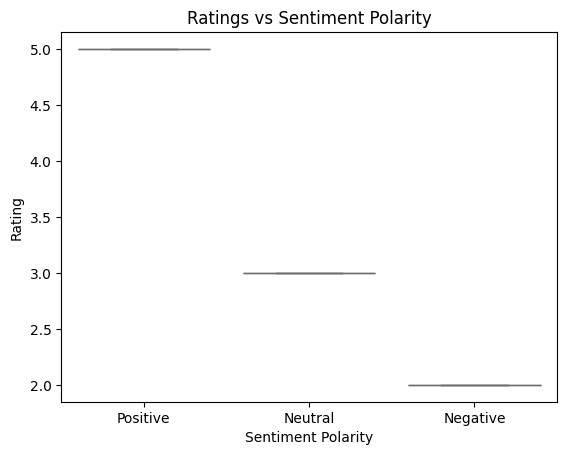

In [11]:
# Boxplot of ratings grouped by sentiment
sns.boxplot(data=df, x='Sentiment Polarity', y='Rating', palette='pastel')
plt.title('Ratings vs Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Rating')
plt.show()

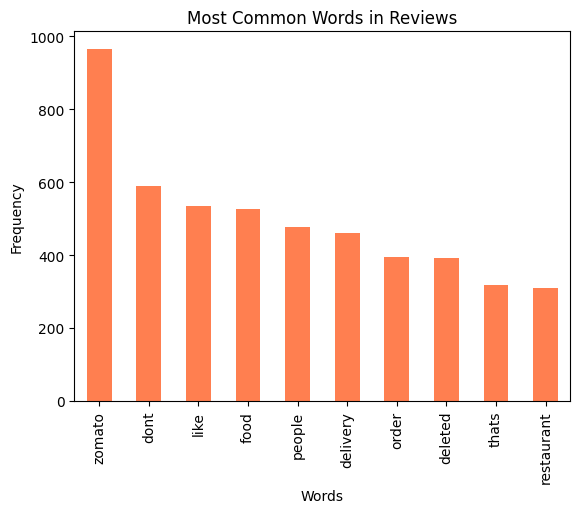

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# Check for missing values and replace with an empty string
df['Cleaned Review'] = df['Cleaned Review'].fillna('')

# Ensure all entries in 'Cleaned Review' are strings
df['Cleaned Review'] = df['Cleaned Review'].astype(str)

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=10, stop_words='english')

# Fit and transform the cleaned review text
word_counts = vectorizer.fit_transform(df['Cleaned Review'])

# Convert to DataFrame for visualization
word_df = pd.DataFrame(word_counts.toarray(), columns=vectorizer.get_feature_names_out())

# Summarize word frequencies
common_words = word_df.sum().sort_values(ascending=False)

# Plot common words
common_words.plot(kind='bar', color='coral')
plt.title('Most Common Words in Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


## Model Building

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

In [14]:
# Define features (text) and target (sentiment)
X = df['Cleaned Review']  # Input: Cleaned reviews
y = df['Sentiment Polarity']  # Target: Sentiment labels (Positive, Neutral, Negative)

# Encode target variable as numeric
y = y.map({'Positive': 1, 'Neutral': 0, 'Negative': -1})

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))

# Fit and transform the data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Check shape of the TF-IDF features
print(f"TF-IDF Train Shape: {X_train_tfidf.shape}")
print(f"TF-IDF Test Shape: {X_test_tfidf.shape}")

TF-IDF Train Shape: (8000, 5000)
TF-IDF Test Shape: (2000, 5000)


In [16]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Predict on test data
y_pred = rf_model.predict(X_test_tfidf)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Classification Report:
              precision    recall  f1-score   support

          -1       0.83      0.50      0.63       344
           0       0.78      0.96      0.86       964
           1       0.83      0.73      0.78       692

    accuracy                           0.80      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.81      0.80      0.79      2000

Accuracy: 0.80


In [18]:
import joblib

# Save the model
joblib.dump(rf_model, 'sentiment_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

## Model Evalution

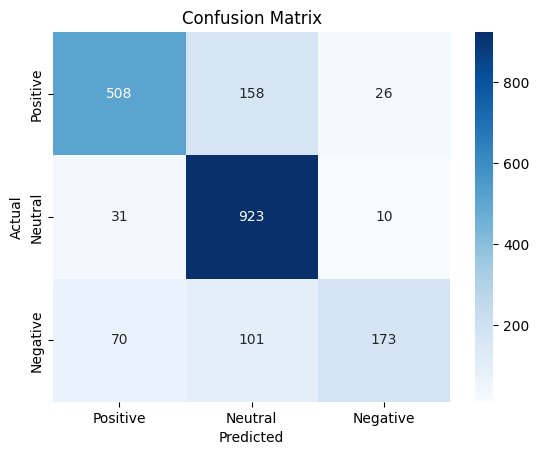

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 0, -1])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Neutral', 'Negative'], yticklabels=['Positive', 'Neutral', 'Negative'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
joblib.dump(rf_model, 'sentiment_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [21]:
import pickle

# Save the model
with open("sentiment_model.pkl", "wb") as model_file:
    pickle.dump(rf_model, model_file)

# Save the vectorizer
with open("tfidf_vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)
